<a href="https://colab.research.google.com/github/dcthyun0308/ESAA/blob/main/ESAA_YB_week06_2FF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LightGBM

- LightGBM은 XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광을 받고 있음.

- LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점이다.

In [1]:
!pip install scikit-learn==1.2.2
!pip install xgboost==1.7.6

!pip install -U "scikit-learn>=1.6,<2"

  Using cached scikit_learn-1.2.2-cp312-cp312-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.14.0 requires scikit-learn<2,>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.2.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.2.2 which is incompatible.
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_

In [3]:
!pip install lightgbm==3.3.2
!pip install numpy==1.26.4

In [4]:
import lightgbm
from lightgbm import LGBMClassifier

# LightGBM 하이퍼 파라미터

- 주요 파라미터

- 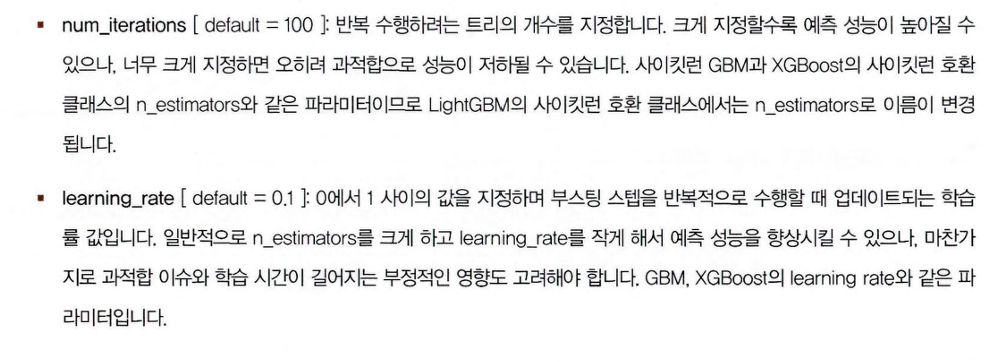

- 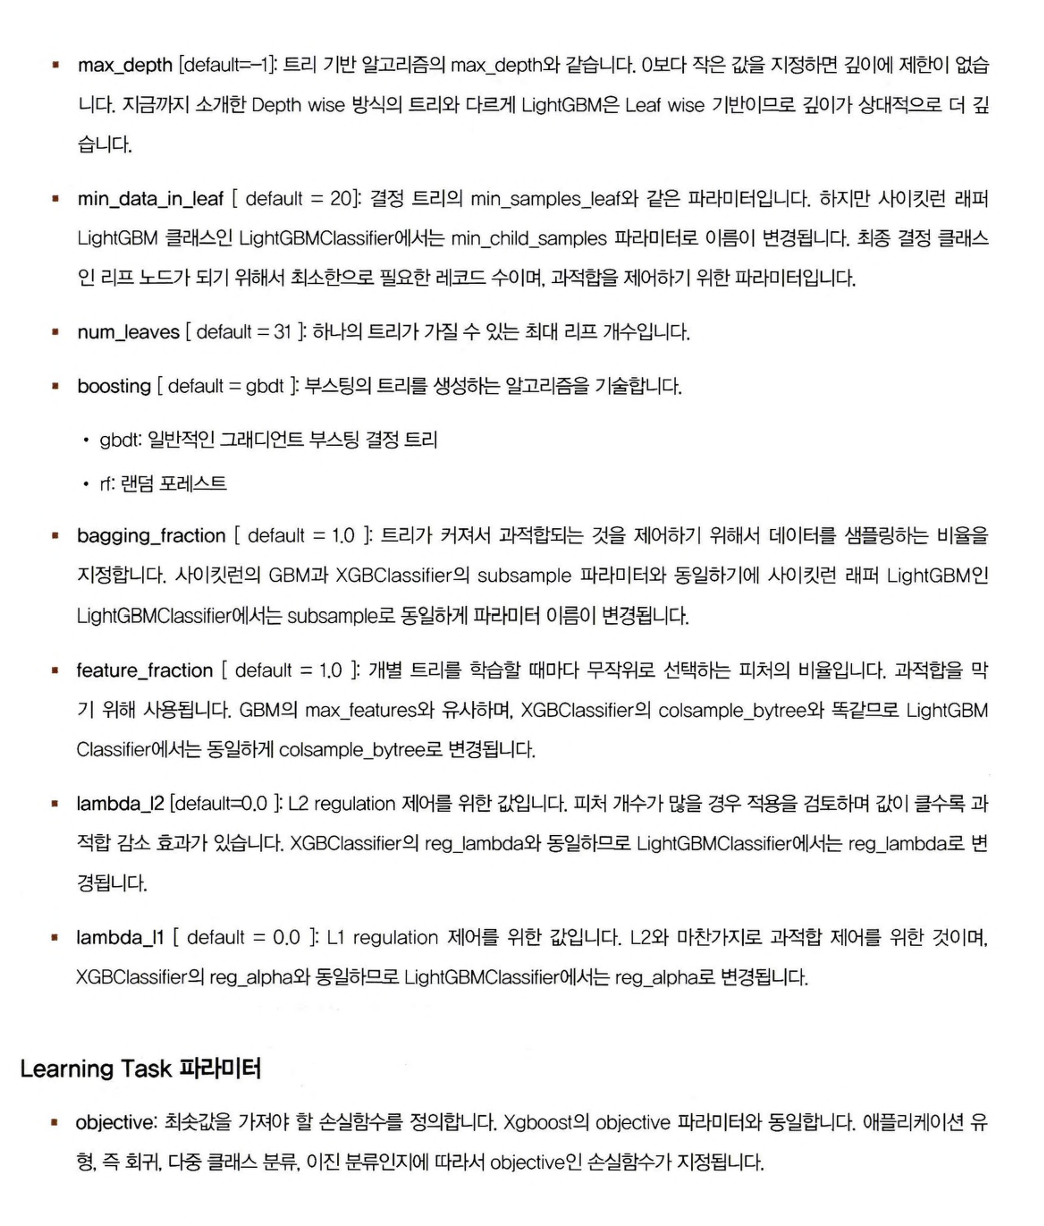

# 하이퍼 파라미터 튜닝 방안

- num_leaves의 개수를 중심으로 min_child_samples, max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안임.

- learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안이므로 이를 적용하는 것도 좋음. 물론 n_estimators를 너무 크게 하는 것은 과적합이므로 오히려 성능이 저하될 수 있음을 유념해야함.

# 파이썬 래퍼 LightGBM과 사이킷런 래퍼 SGBoost, LightGBM 하이퍼 파라미터 비교

- 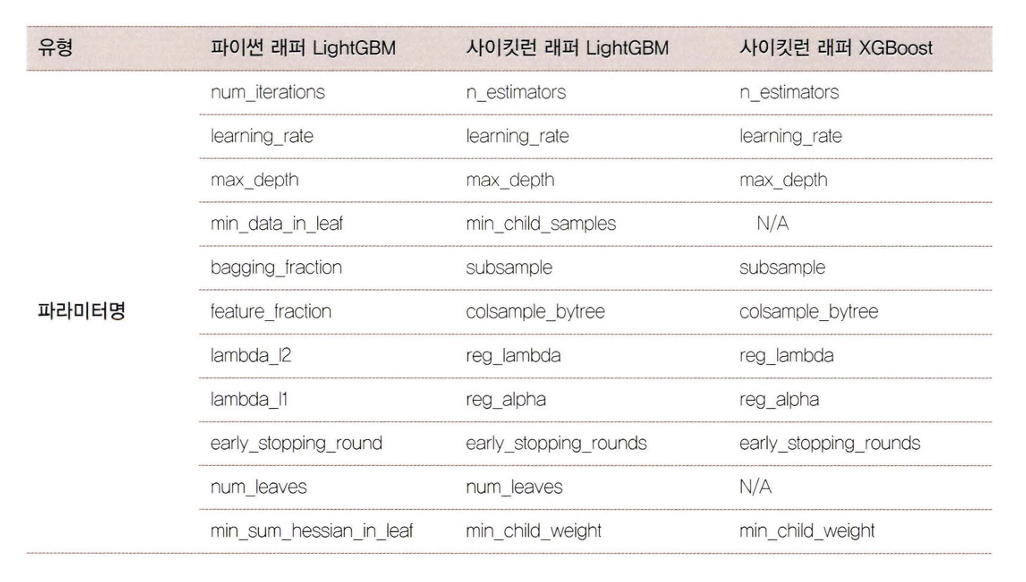

# LightGBM 적용 - 위스콘신 유방암 예측

In [5]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimator는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

- 학습된 LightGBM 모델을 기반으로 예측 성능을 평가해 보자. get_clf_eval() 함수를 이용.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    f1=f1_score(y_test, pred)

    #ROC-AUC 추가
    roc_auc=roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)

    #ROC-AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall,f1,roc_auc))

In [8]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도:0.9561, 정밀도:0.9615, 재현율0.9740, F1:0.9677, AUC:0.9877


- LightGBM 파이썬 패키지는 lightgbm은 XGBoost 파이썬 패키지인 xgboost와 동일하게 피처 중요도를 시각화할 수 있는 내장 API를 제공함. plot_importance(). 또한 사이킷런 래퍼 클래스를 입력해도 시각화를 제공함.

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

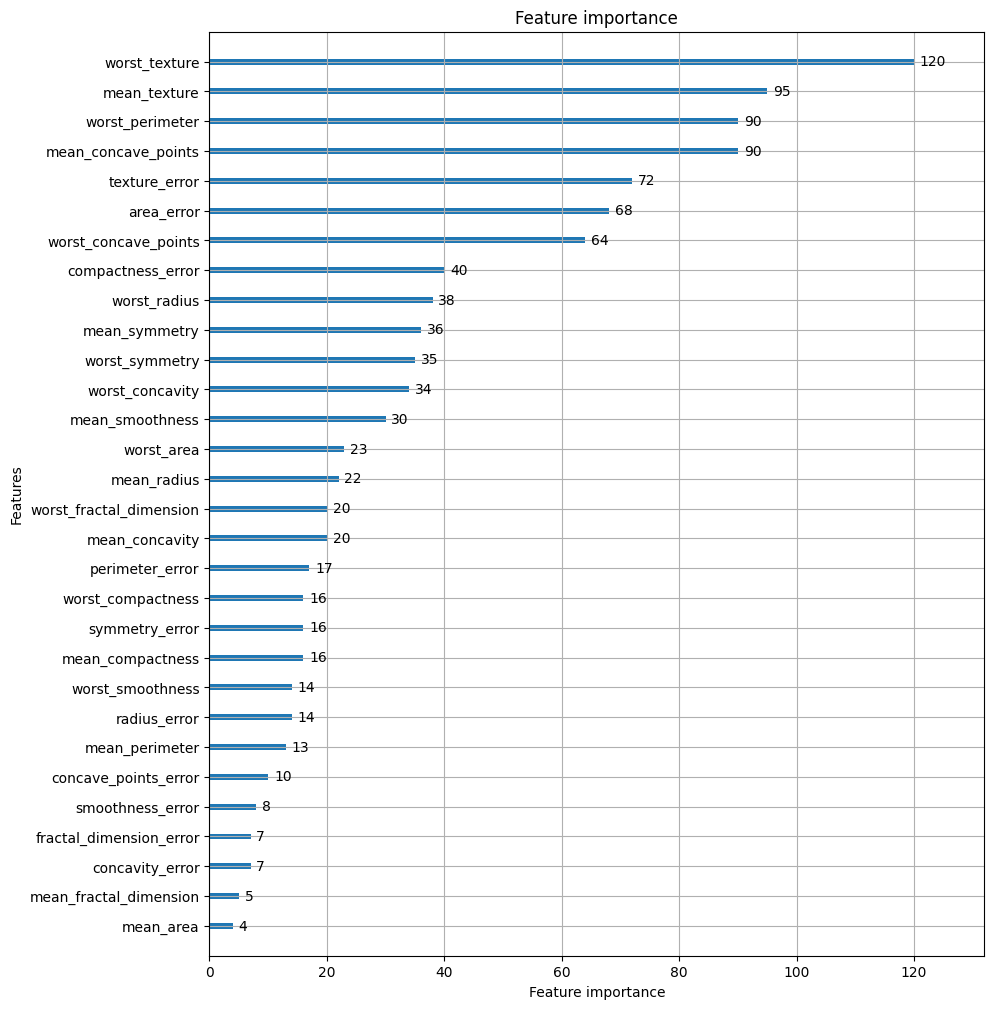

In [9]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

# 베이지안 최적화 기반의 HyperOpt를 이용하 하이퍼 파라미터 튜닝

- Grid Search 방식의 단점은 튜닝해야 할 하이퍼 파라미터 개수가 많을 경우 최적화 수행 시간이 오래 걸린다는 것이었음.

- 밑 예시의 경우 6000회에 걸쳐서 반복적으로 학습과 평가를 수행해야 했기에 수행 시간이 오래 걸릴 수 밖에 없음.

In [10]:
params = {
    'max_depth':[10,20,30,40,50], 'num_leaves':[35,45,55,65],
    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9], 'subsample':[0.5,0.6,0.7,0.8,0.9],
    'min_child_weight':[10,20,30,40], 'reg_alpha':[0.01,0.05,0.1]
}

# - 베이지안 최적화 개요

- 베이지안 최적화를 구성하는 두 가지 중요 요소는 대체 모델(Surrogate Model)과 획득 함수(Acquisition Funtion).

- 대체 모델은 최적 함수를 추정할 때 다양한 알고리즘을 사용할 수 있는데 일반적으로는 가우시안 프로세스를 적용함. 하지만 뒤에서 설명한 HyperOpt는 가우시안 프로세스가 아닌 트리 파르젠 Estimator를 사용함.

# - HyperOpt 사용하기

- 베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공되는 여러 파이썬 패키지들이 있는데 대표적으로는 HyperOpt, Bayesian Optimizaion, Optuna 등을 들 수 있음.

In [11]:
!pip install hyperopt

- HyperOpt hp 모듈을 이용하여 입력 변수명과 입력값의 검색 공간을 설정해 보자.

In [12]:
from hyperopt import hp

# -10~10까지 1간격을 가지는 입력 변수 x와 -15~15까지 1간격으로 입력 변수 y 설정.
search_space = {'x':hp.quniform('x', -10, 10, 1), 'y':hp.quniform('y', -15, 15, 1)}

- 목적 함수를 생성해 보자.

In [13]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
  x = search_space['x']
  y = search_space['y']
  retval = x**2 - 20*y

  return retval

- 이제 입력값의 검색 공간과 목적 함수를 설정했으면 목적 함수의 반환값이 최소가 될 수 있는 최적의 입력값을 베이지안 최적화 기법에 기반하여 찾아 줘야 함.

In [14]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_eval=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 480.80trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


- max_evals 값을 20으로 설정하여 20번의 수행으로 어떤 최적값을 반환하는지 살펴보자.

In [15]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 565.61trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


- fmin() 함수 수행 시 인자로 들어가는 Trials 객체는 함수의 반복 수행 시마다 입력되는 변숫값을 속성으로 가지고 있음. Trials 객체의 중요 속성은 results와 vals가 있음. 이 중 result 함수의 반복 수행 시마다 반환되는 반환값을 가짐. 그리고 vals는 함수의 반복 수행 시마다 입력되는 입력 변숫값을 가짐. 이들 중 먼저 results 속성을 알아보자.

In [16]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


- 아래 예제를 통해서 vals 값을 확인해 보자.

In [17]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


- results와 vals 속성값들을 DataFrame으로 만들어서 좀 더 직관적으로 값을 확인해 보자.

In [18]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x':trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses':losses})
result_df

x     y  losses
0   -6.0   5.0   -64.0
1   -4.0  10.0  -184.0
2    4.0  -2.0    56.0
3   -4.0  12.0  -224.0
4    9.0   1.0    61.0
5    2.0  15.0  -296.0
6   10.0   7.0   -40.0
7   -9.0 -10.0   281.0
8   -8.0   0.0    64.0
9   -0.0  -5.0   100.0
10  -0.0  -3.0    60.0
11   1.0   2.0   -39.0
12   9.0   4.0     1.0
13   6.0  10.0  -164.0
14   9.0   3.0    21.0
15   2.0   3.0   -56.0
16  -2.0 -14.0   284.0
17  -4.0  -8.0   176.0
18   7.0  11.0  -171.0
19  -0.0  -0.0     0.0

# - HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

- 위스콘신 유방암 데이터 세트를 다시 로딩하여 학습, 검증, 테스트 데이터로 분리하자.

In [19]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156)

- max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로, learning_rate는 0.01,에서 0.2 사이, colsample_bytree는 0.5에서 1 사이 정규 분포된 값으로 하이퍼 파라미터 검색 공간을 설정해 보자.

In [20]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
                    }

- 목적 함수를 설정해 보자.

- 첫번째는 검색 공간에서 목적 함수로 입력되는 모든 인자들은 실수형 값이므로 이들을 XGBoostClassifier의 정수형 하이퍼 파라미터값으로 설정할 때는 정수형으로 형변환을 해야 함.

- 두번재는 HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 정확도와 같이 값이 클수록 좋은 성능 지표일 경우 -1을 곱한 뒤 반환하여, 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어 줘야 함.

In [21]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
  # 수행 시간 절약을 위해 nestimators는 100으로 축소
  xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          learning_rate=search_space['learning_rate'],
                          colsample_bytree=search_space['colsample_bytree'],
                          eval_metric='logloss')
  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

  # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
  return {'loss':-1*np.mean(accuracy), 'status':STATUS_OK}

- fmin()을 이용해 최적 하이퍼 파라미터를 도출해 보자.

In [22]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [00:30<00:00,  1.62trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5082503525984262, 'learning_rate': 0.16467121298759432, 'max_depth': 15.0, 'min_child_weight': 2.0}


- fmin()으로 추출된 최적 하이퍼 파라미터를 직접 XGBClassifier에 인자로 입력하기 전에 정수형 하이퍼 파라미터는 정수형으로 형 변환을, 실수형 하이퍼 파라미터는 소수점 5자리까지만 변환 후 확인해 보자.

In [23]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.50825, learning_rate:0.16467, max_depth:15, min_child_weight:2


- 도출된 최적 하이퍼 파라미터들을 이용해서 XGBClassifier를 재학습한 후 성능 평가 결과를 확인해 보자.

In [24]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'],5)
)
evals=[(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.56254	validation_1-logloss:0.58988
[1]	validation_0-logloss:0.46671	validation_1-logloss:0.51284
[2]	validation_0-logloss:0.39302	validation_1-logloss:0.45960
[3]	validation_0-logloss:0.33685	validation_1-logloss:0.41999
[4]	validation_0-logloss:0.28842	validation_1-logloss:0.38898
[5]	validation_0-logloss:0.24941	validation_1-logloss:0.36623
[6]	validation_0-logloss:0.21733	validation_1-logloss:0.34527
[7]	validation_0-logloss:0.19068	validation_1-logloss:0.33161
[8]	validation_0-logloss:0.16824	validation_1-logloss:0.31501
[9]	validation_0-logloss:0.14969	validation_1-logloss:0.30604
[10]	validation_0-logloss:0.13343	validation_1-logloss:0.29715
[11]	validation_0-logloss:0.11943	validation_1-logloss:0.28244


/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.10869	validation_1-logloss:0.27531
[13]	validation_0-logloss:0.09928	validation_1-logloss:0.26940
[14]	validation_0-logloss:0.08964	validation_1-logloss:0.26389
[15]	validation_0-logloss:0.08297	validation_1-logloss:0.26583
[16]	validation_0-logloss:0.07572	validation_1-logloss:0.26178
[17]	validation_0-logloss:0.07099	validation_1-logloss:0.26755
[18]	validation_0-logloss:0.06554	validation_1-logloss:0.26749
[19]	validation_0-logloss:0.06102	validation_1-logloss:0.26008
[20]	validation_0-logloss:0.05773	validation_1-logloss:0.25616
[21]	validation_0-logloss:0.05380	validation_1-logloss:0.25804
[22]	validation_0-logloss:0.05136	validation_1-logloss:0.25974
[23]	validation_0-logloss:0.04874	validation_1-logloss:0.25850
[24]	validation_0-logloss:0.04668	validation_1-logloss:0.25654
[25]	validation_0-logloss:0.04418	validation_1-logloss:0.25512
[26]	validation_0-logloss:0.04200	validation_1-logloss:0.25772
[27]	validation_0-logloss:0.03965	validation_1-logloss:

# 스태킹 앙상블

- 스태킹(Stacking)은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅 및 부스팅과 공통점을 가지고 있음.

# - 기본 스태킹 모델

In [25]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [26]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression()

- 개별 모델을 학습

In [27]:
# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

- 개별 모델의 예측 데이터 세트를 반환하고 각 모델의 예측 정확도를 살펴보자.

In [28]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도 :{0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도 :0.9737


- 개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙어서 피처 값으로 만들어, 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용하자. 반환된 예측 데이터 세트는 1차원 형태의 ndarray이므로 먼저 반환된 예측 결과를 행 형태로 붙인 뒤, 넘파이의 transpose()를 이용해 행과 열 위치를 바꾼 ndarrya로 변환하면 됨.

In [29]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


- 예측 데이터로 생성된 데이터 세트를 기반으로 최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도를 측정해보자.

In [30]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


# - CV 세트 기반의 스태킹

- 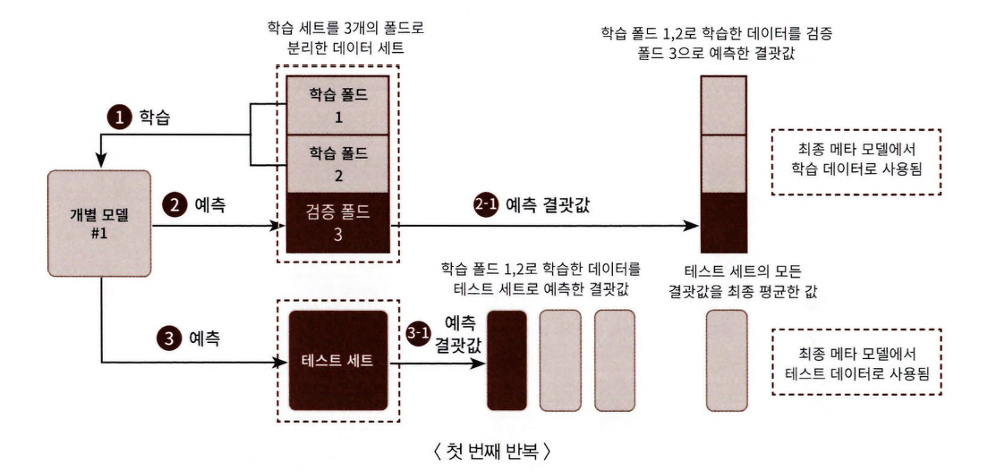

- 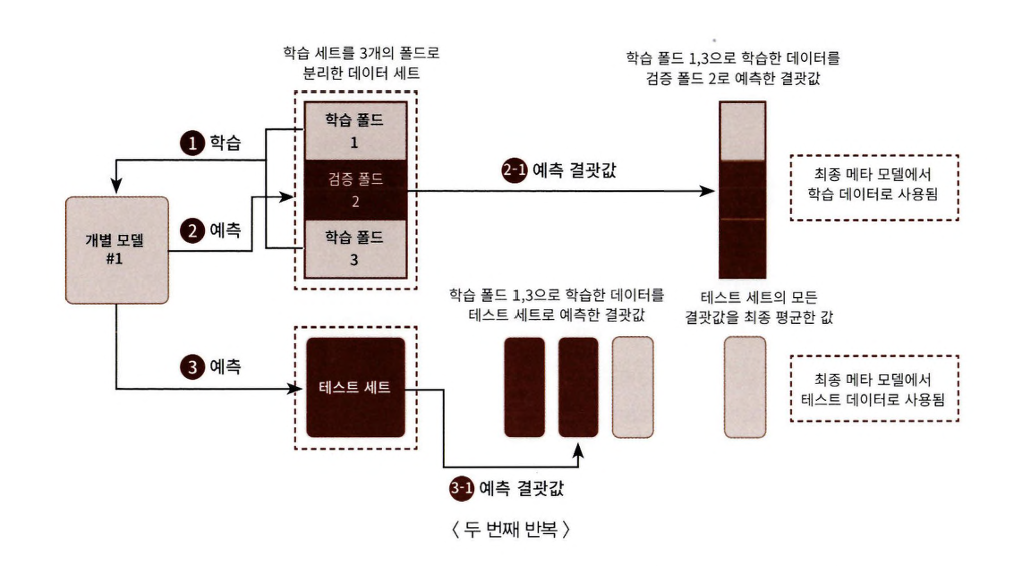

- 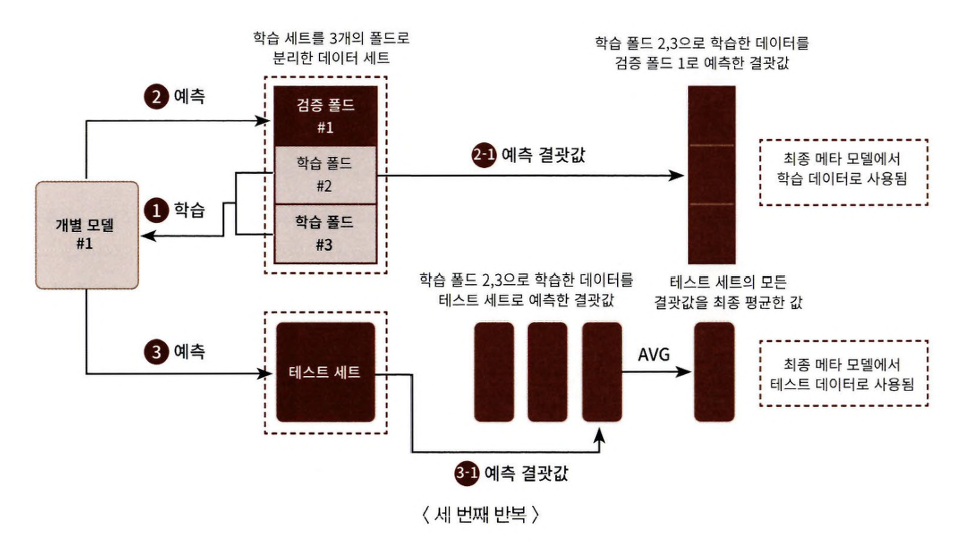

- 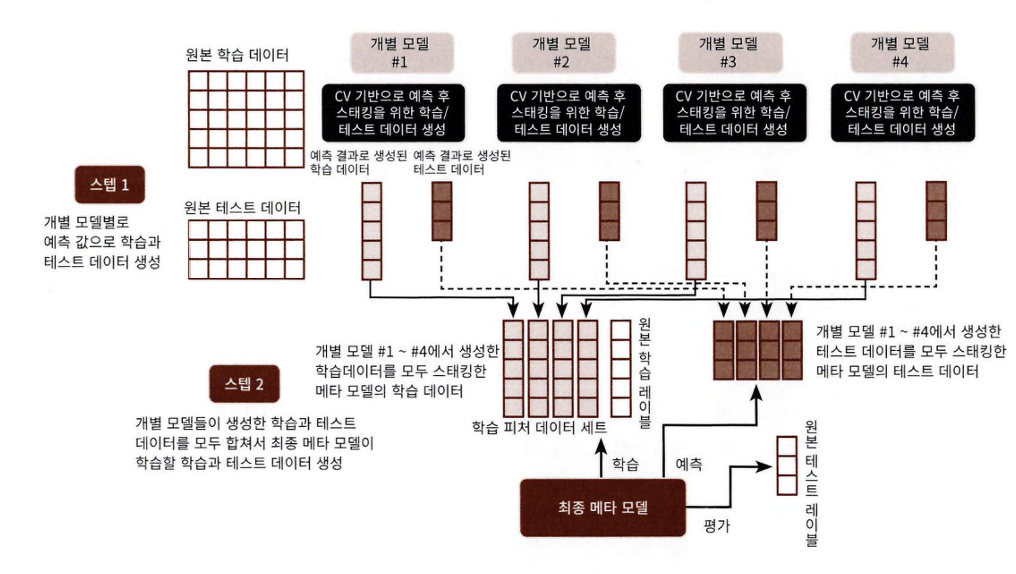

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__,'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

- 이제 여러 개의 분류 모델별로 stack_base_model() 함수를 수행하자.

In [32]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


- 스텝 2를 구현해 보자. 앞의 예제에서 get_stacking_base_datasets() 호출로 반환된 각 모델별 학습 데이터와 테스트 데이터를 합치기만 하면 됨.

In [33]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


- 최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습한 후에 스태킹된 테스트 데이터 세트로 예측하고, 예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도를 측정해 보자.

In [34]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
